In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans
from sklearn import metrics

import random

import warnings
warnings.filterwarnings('ignore')

In [16]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], dtype = np.float64)

data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], dtype = np.float64)

data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)],dtype = np.float64)

data = np.append(np.append(data_1, data_2, axis = 0), data_3, axis = 0)

In [17]:
data.shape

(150, 2)

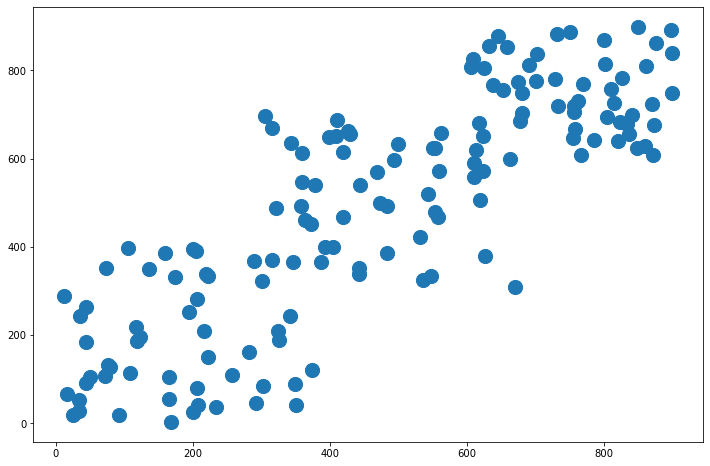

In [18]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(data[:, 0], data[:, 1], s = 200)

In [19]:
labels_1 = np.array([0 for i in range(50)])

labels_2 = np.array([1 for i in range(50)])

labels_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(labels_1, labels_2, axis = 0), labels_3, axis = 0)

In [20]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
df = pd.DataFrame({'data_x' : data[:, 0],
                   'data_y' : data[:, 1],
                   'labels' : labels
                  })

df.sample(10)

,data_x,data_y,labels
78,405.0,400.0,1
137,646.0,878.0,2
23,374.0,122.0,0
14,44.0,264.0,0
96,554.0,625.0,1
93,426.0,662.0,1
120,870.0,723.0,2
79,360.0,546.0,1
71,500.0,633.0,1
100,681.0,748.0,2


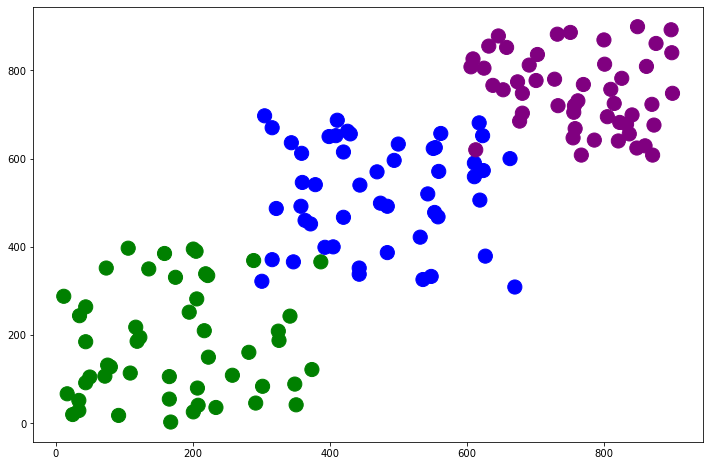

In [22]:
colors = ['green', 'blue', 'purple']

plt.figure(figsize =(12, 8))

plt.scatter(df['data_x'], df['data_y'], c= df['labels'],
            s = 200, cmap = matplotlib.colors.ListedColormap(colors))

In [38]:
k_means_model = KMeans(n_clusters = 3, max_iter = 1000).fit(data)

In [39]:
k_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
centriods = k_means_model.cluster_centers_

centriods

array([[465.58333333, 517.70833333],
       [172.12      , 178.86      ],
       [758.69230769, 747.63461538]])

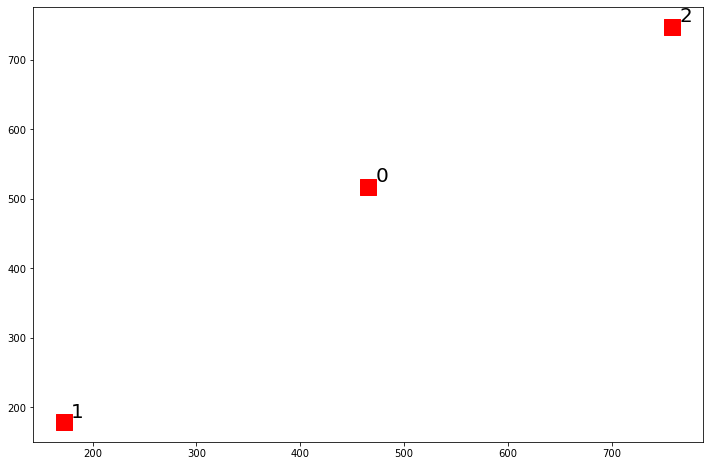

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(centriods[:,0], centriods[:,1], c = 'r', s = 250, marker = 's')

for i in range(len(centriods)):
    plt.annotate(i, (centriods[i][0] + 7, centriods[i][1] + 7), fontsize = 20 )

In [47]:
print('Homogeniety score: ', metrics.homogeneity_score(labels, k_means_model.labels_))

print('Completeness score: ', metrics.completeness_score(labels, k_means_model.labels_))

print('V_measure score: ', metrics.v_measure_score(labels, k_means_model.labels_))

print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels, k_means_model.labels_))

print('Adjusted Mutual Info score: ', metrics.adjusted_mutual_info_score(labels, k_means_model.labels_))

print('Silhouette score: ', metrics.silhouette_score(data, k_means_model.labels_))

Homogeniety score:  0.8417898524602403
Completeness score:  0.8421988161708267
V_measure score:  0.8419942846562574
Adjusted Rand score:  0.8836703826420966
Adjusted Mutual Info score:  0.840016341036896
Silhouette score:  0.5194779635557428


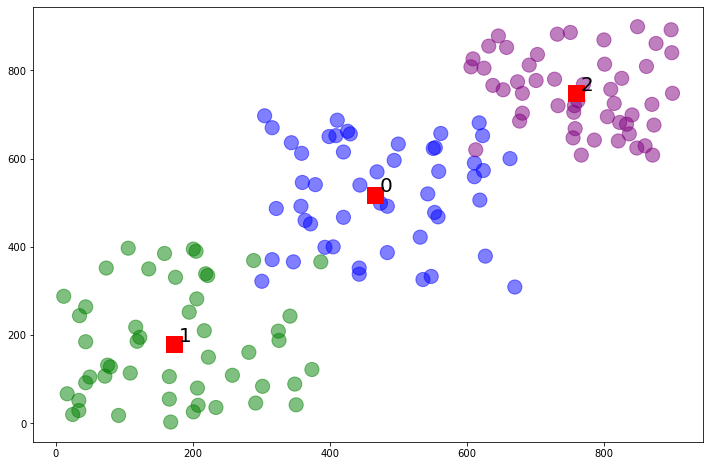

In [48]:
colors = ['green', 'blue', 'purple']

plt.figure(figsize =(12, 8))

plt.scatter(df['data_x'], df['data_y'], c= df['labels'],
            s = 200, cmap = matplotlib.colors.ListedColormap(colors),alpha = 0.5)

plt.scatter(centriods[:,0], centriods[:,1], c = 'r', s = 250, marker = 's')

for i in range(len(centriods)):
    plt.annotate(i, (centriods[i][0] + 7, centriods[i][1] + 7), fontsize = 20 )

In [52]:
data_test = [[442., 621.],
             [50., 153.],
             [333., 373.],
             [835., 816.]]

In [53]:
label_predict = k_means_model.predict(data_test)

In [54]:
label_predict

array([0, 1, 0, 2])

In [ ]:
colors = ['green', 'blue', 'purple']

plt.figure(figsize =(12, 8))

plt.scatter(df['data_x'], df['data_y'], c= df['labels'],
            s = 200, cmap = matplotlib.colors.ListedColormap(colors),alpha = 0.5)

plt.scatter(data_test[:,0], centriods[:,1], c = 'r', s = 250, marker = 's')

for i in range(len(centriods)):
    plt.annotate(i, (centriods[i][0] + 7, centriods[i][1] + 7), fontsize = 20 )
    

plt.scatter(centriods[:,0], centriods[:,1], c = 'r', s = 250, marker = 's')

for i in range(len(centriods)):
    plt.annotate(i, (centriods[i][0] + 7, centriods[i][1] + 7), fontsize = 20 )